In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls

discriminator3.keras  drive  generator3.keras  sample_data


In [ ]:
!ls drive/MyDrive

 2054.pdf	      Classroom		 windows
 AudioMidiFiles      'Colab Notebooks'	'Изменено - ДО_Модуль_1.gdoc'
 cats_vs_dogs_small   data.tgz		 Модуль_2_Ільницький.gdoc


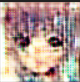
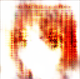
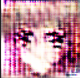

In [ ]:
!tar -xvf drive/MyDrive/data.tgz

Streaming output truncated to the last 5000 lines.
cropped/22979_2008.jpg
cropped/20131_2007.jpg
cropped/47683_2014.jpg
cropped/7328_2004.jpg
cropped/53270_2016.jpg
cropped/5206_2003.jpg
cropped/18522_2007.jpg
cropped/45972_2014.jpg
cropped/57454_2017.jpg
cropped/9157_2004.jpg
cropped/506_2000.jpg
cropped/18744_2007.jpg
cropped/57632_2017.jpg
cropped/9331_2004.jpg
cropped/760_2000.jpg
cropped/20357_2007.jpg
cropped/5060_2003.jpg
cropped/53016_2016.jpg
cropped/51495_2015.jpg
cropped/37388_2012.jpg
cropped/45784_2014.jpg
cropped/62002_2019.jpg
cropped/51805_2015.jpg
cropped/3525_2002.jpg
cropped/47875_2014.jpg
cropped/58685_2017.jpg
cropped/27363_2009.jpg
cropped/44703_2013.jpg
cropped/23547_2008.jpg
cropped/32086_2010.jpg
cropped/14016_2006.jpg
cropped/34953_2011.jpg
cropped/41933_2013.jpg
cropped/40127_2012.jpg
cropped/48452_2014.jpg
cropped/33892_2011.jpg
cropped/11554_2005.jpg
cropped/16377_2006.jpg
cropped/21626_2008.jpg
cropped/33402_2011.jpg
cropped/25002_2009.jpg
cropped/33664_20

In [ ]:
path = os.path.join("/cropped")

In [ ]:
path

'/cropped'

In [ ]:

os.path.exists(path)

False

In [ ]:
count = 30000
data = np.ndarray(shape=(count, 64, 64, 3)).astype('float32')
pathes = glob.glob("cropped/*")

In [ ]:
pathes = pathes[10000:count]

In [ ]:
def get_data(pathes, data):
  i = 0
  for name in pathes:
    try:
      img = keras.utils.load_img(name, target_size=(64, 64))
      data[i,:,:,:] = keras.utils.img_to_array(img)
      i+=1
    except:
      print(name)
  return (data, i)


In [ ]:
(data, count) = get_data(pathes, data)

cropped/6955_2003.jpg
cropped/62823_2019.jpg
cropped/23762_2008.jpg
cropped/26406_2009.jpg
cropped/54405_2016.jpg
cropped/32128_2010.jpg
cropped/48378_2014.jpg
cropped/28555_2010.jpg
cropped/24453_2009.jpg
cropped/55062_2016.jpg
cropped/32898_2011.jpg
cropped/5964_2003.jpg
cropped/40505_2012.jpg
cropped/55695_2016.jpg
cropped/20561_2008.jpg
cropped/8331_2004.jpg
cropped/23647_2008.jpg
cropped/21135_2008.jpg
cropped/45303_2014.jpg
cropped/46529_2014.jpg


In [ ]:
data.shape

(30000, 64, 64, 3)

In [ ]:
data.shape

(30000, 64, 64, 3)

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices(data[:count, :, :, :]).shuffle(64).batch(batch_size=64)

In [ ]:
data = None

In [ ]:
dataset = dataset.map(lambda x: x / 255.0)

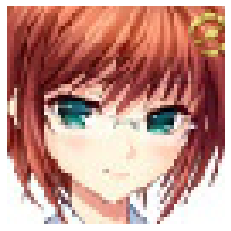

In [ ]:
for x in dataset:
  plt.axis('off')
  plt.imshow((x.numpy()*255).astype("int32")[60])
  break

In [ ]:
discriminator = keras.Sequential(
    [
        keras.Input(shape=(64, 64, 3)),
        layers.Conv2D(64, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Flatten(),
        layers.Dropout(0.2),
        layers.Dense(1, activation="sigmoid"),
    ],
    name="discriminator",
)
discriminator.summary()

Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        3136      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       131200    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         262272    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                                 
 flatten (Flatten)           (None, 8192)            

In [ ]:
latent_dim = 128

In [ ]:
translator = keras.models.Sequential([
    keras.Input(shape=(latent_dim, )),
],name='translator')

for i in range(4):
  translator.add(layers.Dense(latent_dim, activation='relu'))
  translator.add(layers.Dropout(0.5))
translator.add(layers.Dense(latent_dim, activation='relu'))

In [ ]:
translator.summary()

Model: "translator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               1

In [ ]:
latent_dim = 128

In [ ]:


generator = keras.Sequential(
    [
        keras.Input(shape=(latent_dim,)),
        layers.Dense(8 * 8 * 128),
        layers.Reshape((8, 8, 128)),
        layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(256, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(512, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(3, kernel_size=5, padding="same", activation="sigmoid"),
    ],
    name="generator",
)
generator.summary()

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8192)              1056768   
                                                                 
 reshape (Reshape)           (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 16, 16, 128)      262272    
 nspose)                                                         
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 32, 32, 256)      524544    
 ranspose)                                                       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 32, 32, 256)       0 

In [ ]:
discriminator = keras.models.load_model('discriminator.keras')
generator = keras.models.load_model('generator.keras')

In [ ]:
discriminator.summary()

Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        3136      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       131200    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         262272    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                                 
 flatten (Flatten)           (None, 8192)            

In [ ]:
generator.summary()

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8192)              1056768   
                                                                 
 reshape (Reshape)           (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 16, 16, 128)      262272    
 nspose)                                                         
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 32, 32, 256)      524544    
 ranspose)                                                       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 32, 32, 256)       0 

In [ ]:
class GAN(keras.Model):
    def __init__(self, discriminator, generator, latent_dim):
        super(GAN, self).__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super(GAN, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn
        self.d_loss_metric = keras.metrics.Mean(name="d_loss")
        self.g_loss_metric = keras.metrics.Mean(name="g_loss")

    @property
    def metrics(self):
        return [self.d_loss_metric, self.g_loss_metric]

    def train_step(self, real_images):
        # Sample random points in the latent space
        batch_size = tf.shape(real_images)[0]
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))

        # Decode them to fake images
        generated_images = self.generator(random_latent_vectors)

        # Combine them with real images
        combined_images = tf.concat([generated_images, real_images], axis=0)

        # Assemble labels discriminating real from fake images
        labels = tf.concat(
            [tf.ones((batch_size, 1)), tf.zeros((batch_size, 1))], axis=0
        )
        # Add random noise to the labels - important trick!
        labels += 0.05 * tf.random.uniform(tf.shape(labels))

        # Train the discriminator
        with tf.GradientTape() as tape:
            predictions = self.discriminator(combined_images)
            d_loss = self.loss_fn(labels, predictions)
        grads = tape.gradient(d_loss, self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(
            zip(grads, self.discriminator.trainable_weights)
        )

        # Sample random points in the latent space
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))

        # Assemble labels that say "all real images"
        misleading_labels = tf.zeros((batch_size, 1))

        # Train the generator (note that we should *not* update the weights
        # of the discriminator)!
        with tf.GradientTape() as tape:
            predictions = self.discriminator(self.generator(random_latent_vectors))
            g_loss = self.loss_fn(misleading_labels, predictions)
        grads = tape.gradient(g_loss, self.generator.trainable_weights)
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))

        # Update metrics
        self.d_loss_metric.update_state(d_loss)
        self.g_loss_metric.update_state(g_loss)
        return {
            "d_loss": self.d_loss_metric.result(),
            "g_loss": self.g_loss_metric.result(),
        }


In [ ]:
class GANMonitor(keras.callbacks.Callback):

  def __init__(self, num_img=3, latent_dim=128):
    self.num_img = num_img
    self.latent_dim = latent_dim
  
  def on_epoch_end(self, epoch, logs=None):
    random_latent_vectors = tf.random.normal(shape=(self.num_img, self.latent_dim))
    generated_images = self.model.generator(random_latent_vectors)
    generated_images *= 255
    generated_images.numpy()
    for i in range(self.num_img):
       img = keras.preprocessing.image.array_to_img(generated_images[i])
       img.save("generated_img_%03d_%d.png" % (epoch, i))

In [ ]:


gan = GAN(discriminator, generator, latent_dim)
gan.compile(
    d_optimizer = keras.optimizers.Adam(learning_rate=0.0001),
    g_optimizer = keras.optimizers.Adam(learning_rate=0.0002),
    loss_fn = keras.losses.BinaryCrossentropy()
)

In [ ]:
epochs = 200

In [ ]:
gan.fit(
    dataset, epochs=epochs, callbacks=[GANMonitor(num_img=3, latent_dim=latent_dim)]
)

Epoch 1/200
313/313 [==============================] - 360s 1s/step - d_loss: 0.7481 - g_loss: 0.8950
Epoch 2/200
313/313 [==============================] - 360s 1s/step - d_loss: 0.7163 - g_loss: 0.8003
Epoch 3/200
313/313 [==============================] - 360s 1s/step - d_loss: 0.7069 - g_loss: 0.8132
Epoch 4/200
313/313 [==============================] - 360s 1s/step - d_loss: 0.7107 - g_loss: 0.8190
Epoch 5/200
313/313 [==============================] - 360s 1s/step - d_loss: 0.7273 - g_loss: 0.8041
Epoch 6/200
313/313 [==============================] - 358s 1s/step - d_loss: 0.7170 - g_loss: 0.7751
Epoch 7/200
313/313 [==============================] - 358s 1s/step - d_loss: 0.7170 - g_loss: 0.8290
Epoch 8/200
313/313 [==============================] - 358s 1s/step - d_loss: 0.7202 - g_loss: 0.8590
Epoch 9/200
313/313 [==============================] - 360s 1s/step - d_loss: 0.7268 - g_loss: 0.8695
Epoch 10/200
313/313 [==============================] - 361s 1s/step - d_loss: 0.7

In [ ]:
gan.generator.save("generator4.keras")

In [ ]:
gan.discriminator.save("discriminator4.keras")